In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('SalesForCourse_quizz_table.csv')

# Basic Statistics 

In [3]:
data.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [4]:
data.shape

(34867, 16)

In [5]:
data.dtypes

index                 int64
Date                 object
Year                float64
Month                object
Customer Age        float64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity            float64
Unit Cost           float64
Unit Price          float64
Cost                float64
Revenue             float64
Column1             float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,34867.0,17433.000000,10065.380254,0.000000,8716.500000,17433.0,26149.50,34866.0
Year,34866.0,2015.569237,0.495190,2015.000000,2015.000000,2016.0,2016.00,2016.0
Customer Age,34866.0,36.382895,11.112902,17.000000,28.000000,35.0,44.00,87.0
Quantity,34866.0,2.002524,0.813936,1.000000,1.000000,2.0,3.00,3.0
Unit Cost,34866.0,349.880567,490.015846,0.670000,45.000000,150.0,455.00,3240.0
Unit Price,34866.0,389.232485,525.319091,0.666667,53.666667,179.0,521.00,5082.0
Cost,34866.0,576.004532,690.500395,2.000000,85.000000,261.0,769.00,3600.0
Revenue,34867.0,640.870093,736.640033,2.000000,102.000000,319.0,902.00,5082.0
Column1,2574.0,688.054913,774.200897,2.000000,104.250000,390.5,975.75,3681.0


# Rename columns and Check for Nan values

In [8]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = cols

print(data.columns)

Index(['index', 'date', 'year', 'month', 'customer_age', 'customer_gender',
       'country', 'state', 'product_category', 'sub_category', 'quantity',
       'unit_cost', 'unit_price', 'cost', 'revenue', 'column1'],
      dtype='object')


In [9]:
data.isna().sum()

index                   0
date                    1
year                    1
month                   1
customer_age            1
customer_gender         1
country                 1
state                   1
product_category        1
sub_category            1
quantity                1
unit_cost               1
unit_price              1
cost                    1
revenue                 0
column1             32293
dtype: int64

In [10]:
round(data.isna().sum()/len(data),4)*100

index                0.00
date                 0.00
year                 0.00
month                0.00
customer_age         0.00
customer_gender      0.00
country              0.00
state                0.00
product_category     0.00
sub_category         0.00
quantity             0.00
unit_cost            0.00
unit_price           0.00
cost                 0.00
revenue              0.00
column1             92.62
dtype: float64

In [11]:
data = data[data['customer_age'].isna()==False]

In [12]:
data.isna().sum()

index                   0
date                    0
year                    0
month                   0
customer_age            0
customer_gender         0
country                 0
state                   0
product_category        0
sub_category            0
quantity                0
unit_cost               0
unit_price              0
cost                    0
revenue                 0
column1             32292
dtype: int64

In [13]:
data= data.drop(columns=['index', 'column1'])

In [14]:
data.head(100)

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue
0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,09/04/15,2015.0,September,22.0,F,United States,Washington,Clothing,Jerseys,2.0,486.00,535.500000,972.0,1071.0
96,09/06/15,2015.0,September,22.0,F,United States,Washington,Accessories,Bottles and Cages,2.0,25.00,26.500000,50.0,53.0
97,10/22/15,2015.0,October,22.0,F,United States,Washington,Accessories,Bottles and Cages,1.0,189.00,179.000000,189.0,179.0
98,10/22/15,2015.0,October,22.0,F,United States,Washington,Accessories,Bottles and Cages,3.0,6.67,7.000000,20.0,21.0


# Check and deal with unique values 

In [15]:
data['state'].value_counts(dropna=False)

California             10332
England                 6421
Washington              5204
Oregon                  2446
Saarland                1287
Nordrhein-Westfalen     1171
Hessen                  1112
Seine (Paris)           1092
Hamburg                  869
Seine Saint Denis        796
Nord                     787
Bayern                   668
Hauts de Seine           509
Essonne                  465
Yveline                  442
Seine et Marne           183
Moselle                  181
Loiret                   178
Val d'Oise               130
Garonne (Haute)          100
Brandenburg               94
Val de Marne              75
Charente-Maritime         70
Somme                     61
Loir et Cher              57
Pas de Calais             42
Illinois                  14
Texas                     14
Ohio                      13
New York                  10
Florida                    7
South Carolina             5
Utah                       5
Kentucky                   4
Wyoming       

In [16]:
def clean_data(x):
    
    if x in ["Illinois", "Texas", "Ohio", "New York", "Florida", "South Carolina","Utah", "Kentucky","Wyoming", "Minnesota", "North Carolina", "Georgia","Virginia", "Mississippi", "Montana", "Arizona", "Alabama", "Missouri", "Massachusetts"]:
        return "Other_U.S_States"
    else:
        return x

data['state'] = data['state'].apply(clean_data)
data['state'].value_counts()

California             10332
England                 6421
Washington              5204
Oregon                  2446
Saarland                1287
Nordrhein-Westfalen     1171
Hessen                  1112
Seine (Paris)           1092
Hamburg                  869
Seine Saint Denis        796
Nord                     787
Bayern                   668
Hauts de Seine           509
Essonne                  465
Yveline                  442
Seine et Marne           183
Moselle                  181
Loiret                   178
Val d'Oise               130
Garonne (Haute)          100
Brandenburg               94
Other_U.S_States          94
Val de Marne              75
Charente-Maritime         70
Somme                     61
Loir et Cher              57
Pas de Calais             42
Name: state, dtype: int64

In [17]:
# Bin the column customer_age to deal with unique values

In [18]:
data['customer_age'].value_counts()

31.0    1307
28.0    1277
34.0    1260
29.0    1234
30.0    1204
        ... 
87.0       3
80.0       3
74.0       2
76.0       2
82.0       2
Name: customer_age, Length: 70, dtype: int64

In [19]:
print('Maximum value',data['customer_age'].max())
print('Minimum value',data['customer_age'].min())
print('Mean value',data['customer_age'].mean())

Maximum value 87.0
Minimum value 17.0
Mean value 36.38289451041129


In [20]:
#function to bin into categories

def age_bins(x):
    if x < 27:
        return '27 under'
    elif x >=27 and x < 37:
        return '27-36'
    elif x >=37 and x < 47:
        return '37-46'
    elif x >=47 and x < 57:
        return '47-56'
    elif x >=57 and x < 67:
        return '57-66'
    elif x >=67 and x < 77 :
        return '67-76'
    
    else:
        return '77 and Over'

data['customer_age'] = list(map(age_bins, data['customer_age']))

data

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue
0,02/19/16,2016.0,February,27-36,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,02/20/16,2016.0,February,27-36,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,02/27/16,2016.0,February,27-36,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,03/12/16,2016.0,March,27-36,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,03/12/16,2016.0,March,27-36,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,03/22/15,2015.0,March,37-46,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0
34862,02/07/16,2016.0,February,37-46,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0
34863,03/13/15,2015.0,March,37-46,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0
34864,04/05/15,2015.0,April,37-46,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0


In [21]:
data['customer_age'].value_counts()

27-36          11864
37-46           9357
27 under        7092
47-56           4927
57-66           1431
67-76            136
77 and Over       59
Name: customer_age, dtype: int64

# Change the type of some variables 

In [22]:
data.dtypes

date                 object
year                float64
month                object
customer_age         object
customer_gender      object
country              object
state                object
product_category     object
sub_category         object
quantity            float64
unit_cost           float64
unit_price          float64
cost                float64
revenue             float64
dtype: object

In [23]:
data['date']=pd.to_datetime(data['date'], errors='coerce')

In [24]:
data['year']= data['year'].astype(float).astype(int)

In [25]:
data['quantity']= data['quantity'].astype(float).astype(int)

In [26]:
data.dtypes

date                datetime64[ns]
year                         int64
month                       object
customer_age                object
customer_gender             object
country                     object
state                       object
product_category            object
sub_category                object
quantity                     int64
unit_cost                  float64
unit_price                 float64
cost                       float64
revenue                    float64
dtype: object

In [27]:
data.head()

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue
0,2016-02-19,2016,February,27-36,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.000000,80.0,109.0
1,2016-02-20,2016,February,27-36,F,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49.0,57.0
2,2016-02-27,2016,February,27-36,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.000000,11.0,15.0
3,2016-03-12,2016,March,27-36,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.500000,175.0,233.0
4,2016-03-12,2016,March,27-36,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.666667,105.0,125.0


In [28]:
data['customer_gender'].value_counts()

M    17805
F    17061
Name: customer_gender, dtype: int64

In [29]:
data['sub_category'].value_counts()

Tires and Tubes      11112
Bottles and Cages     5295
Helmets               4176
Road Bikes            3022
Mountain Bikes        2737
Jerseys               2000
Caps                  1517
Touring Bikes         1334
Fenders                762
Shorts                 566
Cleaners               545
Gloves                 480
Hydration Packs        396
Socks                  364
Vests                  312
Bike Stands            145
Bike Racks             103
Name: sub_category, dtype: int64

In [30]:
# To check if cost column and revenue column are the results of multiplying unit_cost and quantity,
# unit price and quantity, respectivley. 


data['new_column_cost'] = round(data['unit_cost']* data['quantity'], 1)
data['new_column_revenue'] = round(data['unit_price']* data['quantity'], 1)

In [31]:
data.head(60)

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue,new_column_cost,new_column_revenue
0,2016-02-19,2016,February,27-36,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.000000,80.0,109.0,80.0,109.0
1,2016-02-20,2016,February,27-36,F,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49.0,57.0,49.0,57.0
2,2016-02-27,2016,February,27-36,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.000000,11.0,15.0,11.0,15.0
3,2016-03-12,2016,March,27-36,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.500000,175.0,233.0,175.0,233.0
4,2016-03-12,2016,March,27-36,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.666667,105.0,125.0,105.0,125.0
5,2016-04-08,2016,April,27-36,F,United States,Washington,Accessories,Tires and Tubes,1,66.00,78.000000,66.0,78.0,66.0,78.0
6,2016-04-17,2016,April,27-36,F,United States,Washington,Accessories,Tires and Tubes,2,52.00,60.000000,104.0,120.0,104.0,120.0
7,2016-04-17,2016,April,27-36,F,United States,Washington,Accessories,Tires and Tubes,1,60.00,68.000000,60.0,68.0,60.0,68.0
8,2016-06-22,2016,June,27-36,F,United States,Washington,Accessories,Tires and Tubes,2,8.00,10.000000,16.0,20.0,16.0,20.0
9,2016-06-22,2016,June,27-36,F,United States,Washington,Accessories,Tires and Tubes,2,2.50,3.000000,5.0,6.0,5.0,6.0


In [32]:
data["new_column_cost"]= data["new_column_cost"] == data["cost"]
data["new_column_cost"].value_counts()

True    34866
Name: new_column_cost, dtype: int64

In [33]:
data["new_column_revenue"]= data["new_column_revenue"] == data["revenue"]
data["new_column_revenue"].value_counts()

True    34866
Name: new_column_revenue, dtype: int64

# Add a new column 'profit'

In [34]:
# To see which product category is more profitable, we create a new cloumn 'profit' by subtracting cost from revenue 

data['profit'] = data['revenue']- data['cost']

data

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue,new_column_cost,new_column_revenue,profit
0,2016-02-19,2016,February,27-36,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.000000,80.0,109.0,True,True,29.0
1,2016-02-20,2016,February,27-36,F,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49.0,57.0,True,True,8.0
2,2016-02-27,2016,February,27-36,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.000000,11.0,15.0,True,True,4.0
3,2016-03-12,2016,March,27-36,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.500000,175.0,233.0,True,True,58.0
4,2016-03-12,2016,March,27-36,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.666667,105.0,125.0,True,True,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,2015-03-22,2015,March,37-46,M,France,Charente-Maritime,Bikes,Mountain Bikes,1,2049.00,1487.000000,2049.0,1487.0,True,True,-562.0
34862,2016-02-07,2016,February,37-46,M,France,Hauts de Seine,Bikes,Mountain Bikes,2,1160.00,985.500000,2320.0,1971.0,True,True,-349.0
34863,2015-03-13,2015,March,37-46,M,France,Hauts de Seine,Bikes,Mountain Bikes,1,2049.00,1583.000000,2049.0,1583.0,True,True,-466.0
34864,2015-04-05,2015,April,37-46,M,France,Hauts de Seine,Bikes,Mountain Bikes,3,683.00,560.666667,2049.0,1682.0,True,True,-367.0


# Check for outliers 

In [35]:
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(object)

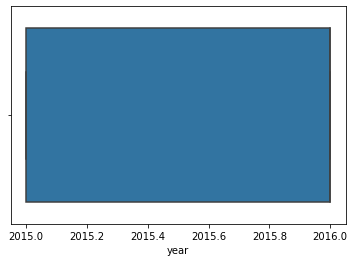

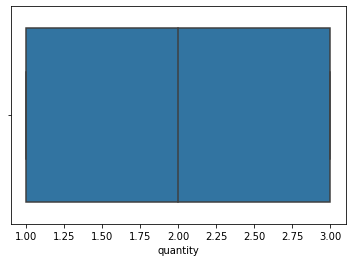

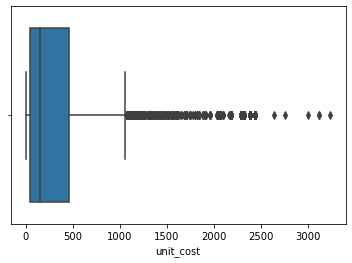

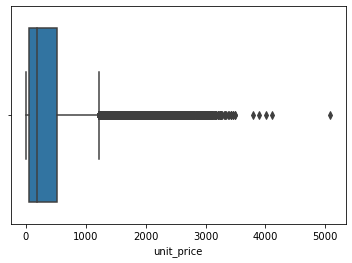

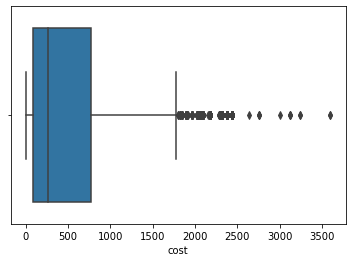

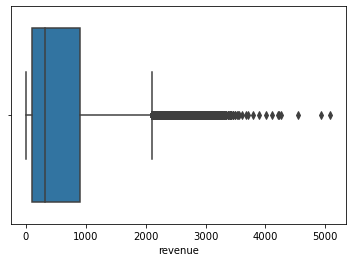

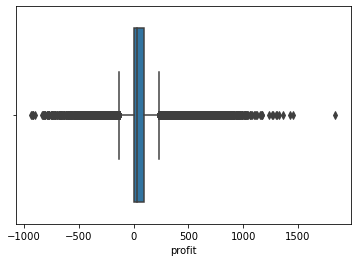

In [36]:
for i in numerical.columns:
    sns.boxplot(x = i, data = numerical)
    plt.show()

In [37]:
# It can be seen from the boxplots that unit_cost, unit_price,cost, revenue and profit consist of some outliers.

In [38]:
# Removing the oultiers

df = data.copy()

df = df[data['unit_cost'] < 1500]
df = df[data['unit_price'] < 3000]
df = df[data['cost'] < 2300]
df = df[data['revenue'] < 3400]

df.shape

/var/folders/nb/lfzlcsrj38n5g0jr2ql_tmgc0000gn/T/ipykernel_11163/3105449951.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[data['unit_price'] < 3000]
/var/folders/nb/lfzlcsrj38n5g0jr2ql_tmgc0000gn/T/ipykernel_11163/3105449951.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[data['cost'] < 2300]
/var/folders/nb/lfzlcsrj38n5g0jr2ql_tmgc0000gn/T/ipykernel_11163/3105449951.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[data['revenue'] < 3400]


(32129, 17)

# Perform Explanatory Data Analysis (EDA) graphically

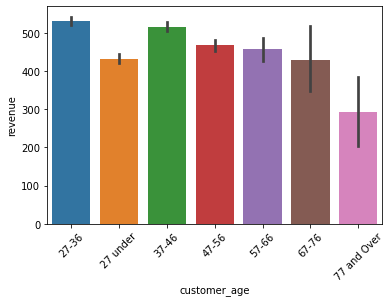

In [39]:
sns.barplot(x= 'customer_age', y= 'revenue',data=df)
plt.xticks(rotation=45)
plt.show()

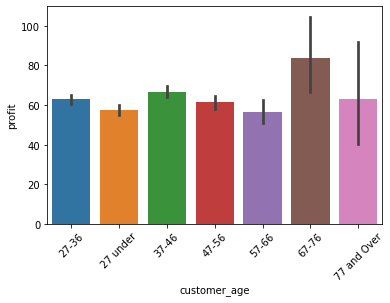

In [40]:
sns.barplot(x= 'customer_age', y= 'profit',data=df)
plt.xticks(rotation=45)
plt.show()

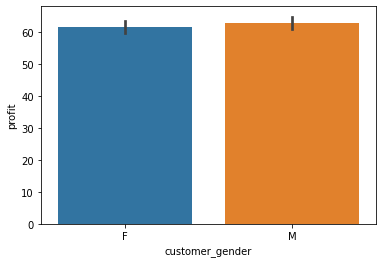

In [41]:
sns.barplot(x= 'customer_gender', y= 'profit',data=df)
plt.show()

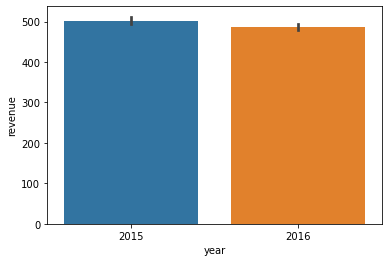

In [42]:
sns.barplot(x= 'year', y= 'revenue',data=df)
plt.show()

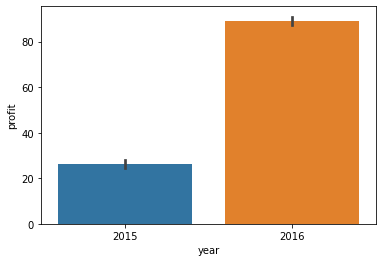

In [43]:
sns.barplot(x= 'year', y= 'profit',data=df)
plt.show()

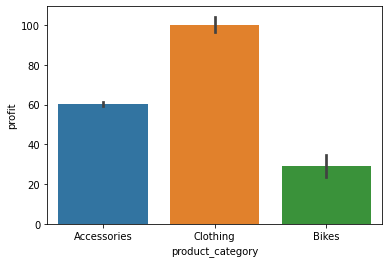

In [44]:
sns.barplot(x= 'product_category', y= 'profit',data=df)
plt.show()

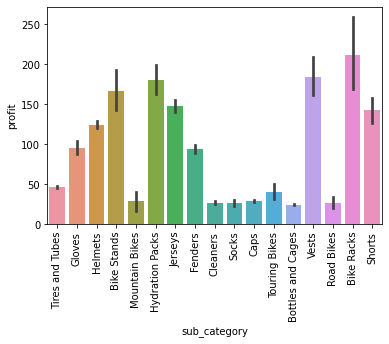

In [45]:
sns.barplot(x= 'sub_category', y= 'profit',data=df)
plt.xticks(rotation=90)
plt.show()

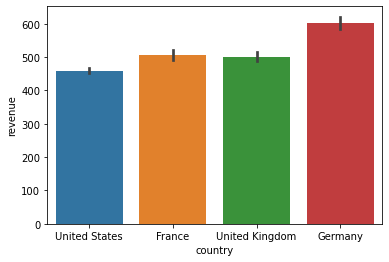

In [46]:
sns.barplot(x='country', y= 'revenue',data=df)
plt.show()

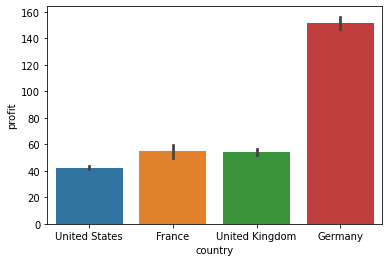

In [47]:
sns.barplot(x= 'country', y= 'profit',data=df)
plt.show()

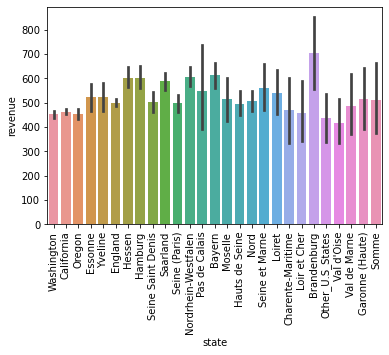

In [48]:
sns.barplot(x= 'state', y= 'revenue',data=df)
plt.xticks(rotation=90)
plt.show()

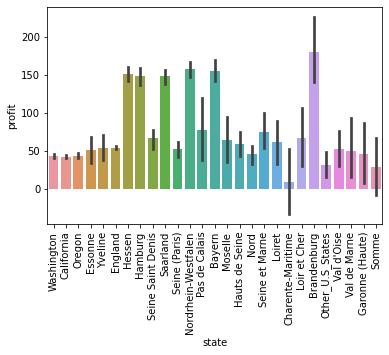

In [49]:
sns.barplot(x= 'state', y= 'profit',data=df)
plt.xticks(rotation=90)
plt.show()

# Connect the data to SQL

In [50]:
import pymysql
from sqlalchemy import create_engine
from sqlalchemy import MetaData
import getpass
password = getpass.getpass()
from sqlalchemy_utils import database_exists, create_database
import pandas as pd

········


In [51]:

# create connection to SQL; create a new database

connection_string ='mysql+pymysql://root:'+ password + '@localhost/mid_project'
engine = create_engine (connection_string)
if not database_exists(engine.url):
    create_database(engine.url)

# metadata is like temporary memory in python to collect data (or dataframes) that we want to put in the SQL database

metadata_obj = MetaData()

# create tables from existing pandas df

df.to_sql("customer_spendings_analysis", engine, if_exists = "replace")

32129

# Hypothesis testing 

In [52]:
# Checking fisrt the revenue 

df['revenue'].mean()

493.5989604407233

In [53]:
revenue_by_county = df[df['country']=='United States']
US_revenue = revenue_by_county['revenue']

In [54]:
US_revenue

0        109.0
1         57.0
2         15.0
3        233.0
4        125.0
         ...  
34717     52.0
34718    227.0
34721    529.0
34722    131.0
34723    662.0
Name: revenue, Length: 16897, dtype: float64

#H0: U.S has an average revenue = average total revenue 
#H1: U.S has an average revenue != average total revenue

In [55]:
import scipy.stats as st
from scipy.stats import ttest_1samp

In [56]:
stat,pvalue = ttest_1samp(US_revenue,493.59)

print('Stat_Score =  ',stat)
print('Pvalue =  ',pvalue)

Stat_Score =   -9.06980664794137
Pvalue =   1.320602756623052e-19


In [57]:
US_revenue.mean()

458.02254838136946

In [58]:
# It's a very small p_value compared to 0.05 therefore, we can reject the null hypothesis 
# U.S has an average revenue that is significantly different than the average total revenue 

In [59]:
revenue_by_county2 = df[df['country']=='France']
France_revenue = revenue_by_county2['revenue']

In [60]:
France_revenue

295       629.0
296        52.0
297        20.0
298       965.0
299       155.0
          ...  
34848      82.0
34849    1662.0
34850     584.0
34851      24.0
34864    1682.0
Name: revenue, Length: 4707, dtype: float64

#H0: France has an average revenue = average total revenue 
#H1: France has an average revenue != average total revenue

In [61]:
stat,pvalue = ttest_1samp(France_revenue,493.59)

print('Stat_Score =  ',stat)
print('Pvalue =  ',pvalue)

Stat_Score =   1.525363692880955
Pvalue =   0.12723560769704204


In [62]:
France_revenue.mean()

506.0469513490546

In [63]:
# The p_value is higher than 0.05 therefore we cannot reject the null hypothesis  
# France has an average revenue that is significantly close to the average total revenue

In [64]:
revenue_by_county3 = df[df['country']=='Germany']
Germany_revenue = revenue_by_county3['revenue']

In [65]:
Germany_revenue

376      1066.0
377        56.0
379      1178.0
380       113.0
382        76.0
          ...  
34830    1232.0
34831     117.0
34832      27.0
34840     965.0
34860    1072.0
Name: revenue, Length: 4686, dtype: float64

#H0: Germany has an average revenue = average total revenue 
#H1: Germany has an average revenue != average total revenue

In [66]:
stat,pvalue = ttest_1samp(Germany_revenue,493.59)

print('Stat_Score =  ',stat)
print('Pvalue =  ',pvalue)

Stat_Score =   11.537177314828213
Pvalue =   2.1977444531432517e-30


In [67]:
Germany_revenue.mean()

601.5582586427657

In [68]:
# It's a very small p_value compared to 0.05 therefore, we can reject the null hypothesis 
# Germany has an average revenue that is significantly different from the average total revenue 

In [69]:
revenue_by_county4 = df[df['country']=='United Kingdom']
UK_revenue = revenue_by_county4['revenue']

In [70]:
UK_revenue

336       567.0
337       283.0
340      1023.0
342       181.0
344      1370.0
          ...  
34852     300.0
34853      38.0
34854      94.0
34857     814.0
34858     798.0
Name: revenue, Length: 5839, dtype: float64

#H0: UK has an average revenue = average total revenue 
#H1: UK has an average revenue != average total revenue

In [71]:
stat,pvalue = ttest_1samp(UK_revenue,493.59)

print('Stat_Score =  ',stat)
print('Pvalue =  ',pvalue)

Stat_Score =   0.8863421762462972
Pvalue =   0.37546967667684883


In [72]:
UK_revenue.mean()

499.87480733002224

In [73]:
# The p_value is higher than 0.05 therefore we cannot reject the null hypothesis
# UK has an average revenue that is significantly close to the average total revenue 

# Test Profit

#H0: Mean Profit for each country = Mean total profit
#H1: There will be at least one population mean that differs from the rest

In [74]:
profit_by_county = df[df['country']=='United States']
US_profit = profit_by_county['profit']

In [75]:
profit_by_county2 = df[df['country']=='Germany']
Germany_profit = profit_by_county2['profit']

In [76]:
profit_by_county3 = df[df['country']=='France']
France_profit = profit_by_county3['profit']

In [77]:
profit_by_county4 = df[df['country']=='United Kingdom']
UK_profit = profit_by_county4['profit']

In [78]:
US_profit

0         29.0
1          8.0
2          4.0
3         58.0
4         20.0
         ...  
34717      8.0
34718     -1.0
34721     79.0
34722     11.0
34723    112.0
Name: profit, Length: 16897, dtype: float64

In [79]:
Germany_profit

376      406.0
377       19.0
379      424.0
380       38.0
382       22.0
         ...  
34830    391.0
34831     32.0
34832      9.0
34840    196.0
34860    303.0
Name: profit, Length: 4686, dtype: float64

In [80]:
France_profit

295      136.0
296       12.0
297        2.0
298       11.0
299        2.0
         ...  
34848     14.0
34849    138.0
34850    160.0
34851      4.0
34864   -367.0
Name: profit, Length: 4707, dtype: float64

In [81]:
UK_profit

336       27.0
337       38.0
340      253.0
342       41.0
344      320.0
         ...  
34852     75.0
34853     11.0
34854      4.0
34857     72.0
34858     56.0
Name: profit, Length: 5839, dtype: float64

In [82]:
from scipy.stats import f_oneway

f_oneway(US_profit, Germany_profit, France_profit, UK_profit)

F_onewayResult(statistic=1098.672180296722, pvalue=0.0)

In [83]:
df['profit'].mean()

62.32198325500327

In [84]:
US_profit.mean()

42.50150914363496

In [85]:
Germany_profit.mean()

151.88689714041826

In [86]:
France_profit.mean()

54.65646908859146

In [87]:
UK_profit.mean()

53.97927727350574

In [88]:
# The P_value is smaller than 0.05, so we can reject the null hypothesis that 
# all countries have the same average profit which equal to the average total profit. 

In [89]:
df.to_csv('customer_spendings_analysis.csv', index=False)